In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.templates.default = "plotly_dark"
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
shark_tank = pd.read_csv('/content/drive/MyDrive/DATA ANALYST PROJECTS/Shark Tank India.csv')
shark_tank

,Season Number,Season Start,Season End,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,...,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Guest Name
0,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,1,BluePineFoods,Food,Frozen Momos,https://bluepinefoods.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,2,BoozScooters,Vehicles/Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,3,HeartUpMySleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",4,TagzFoods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",5,HeadAndHeart,Education,Brain Development Course,https://thehnh.in/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2,02-Jan-23,10-Mar-23,50,Season Finale With The Sharks,316,MYBYK,Vehicles/Electrical Vehicles,IoT-enabled bikes,https://mybyk.in/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2,02-Jan-23,10-Mar-23,51,Gateway To Shark Tank India,317,GODESi,Food,Handmade lollipops,https://godesi.in/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317,2,02-Jan-23,10-Mar-23,51,Gateway To Shark Tank India,318,TAC,Beauty/Fashion,"ayurveda co for glowing skin, makeup & open pores",https://theayurvedaco.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,40.5,0.5,34.5,Vikas
318,2,02-Jan-23,10-Mar-23,51,Gateway To Shark Tank India,319,Naara-Aaba,Liquor/Beverages,pears and plum wine,https://www.naaraaaba.com/,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,2.5,12.5,Vikas


In [3]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              320 non-null    int64  
 1   Season Start               320 non-null    object 
 2   Season End                 320 non-null    object 
 3   Episode Number             320 non-null    int64  
 4   Episode Title              320 non-null    object 
 5   Pitch Number               320 non-null    int64  
 6   Startup Name               320 non-null    object 
 7   Industry                   320 non-null    object 
 8   Business Description       320 non-null    object 
 9   Company Website            309 non-null    object 
 10  Number of Presenters       320 non-null    int64  
 11  Male Presenters            281 non-null    float64
 12  Female Presenters          149 non-null    float64
 13  Transgender Presenters     3 non-null      float64

In [4]:
shark_tank.describe()

,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Started in,Yearly Revenue,...,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount
count,320.000000,320.000000,320.000000,320.000000,281.000000,149.000000,3.0,315.000000,184.000000,134.000000,...,11.000000,8.000000,8.000000,0.0,21.000000,21.000000,4.000000,2.000000,2.000000,2.000000
mean,1.525000,21.550000,160.500000,2.078125,1.722420,1.194631,1.0,0.187302,2018.472826,355.947761,...,31.090909,19.998782,6.462500,NaN,38.138571,5.190314,36.250000,32.750000,1.500000,23.500000
std,0.500157,14.676362,92.520268,0.847358,0.866744,0.429925,0.0,0.390774,2.495750,918.888781,...,15.332675,10.946848,5.326199,NaN,26.305707,5.599211,23.935678,10.960155,1.414214,15.556349
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,2005.000000,-1.000000,...,10.000000,0.000253,1.000000,NaN,5.000000,1.000000,10.000000,25.000000,0.500000,12.500000
25%,1.000000,9.000000,80.750000,2.000000,1.000000,1.000000,1.0,0.000000,2017.000000,0.000000,...,23.500000,14.995000,4.050000,NaN,18.750000,1.500000,21.250000,28.875000,1.000000,18.000000
50%,2.000000,21.000000,160.500000,2.000000,2.000000,1.000000,1.0,0.000000,2019.000000,100.000000,...,25.000000,22.500000,5.000000,NaN,30.000000,3.000000,35.000000,32.750000,1.500000,23.500000
75%,2.000000,33.000000,240.250000,2.000000,2.000000,1.000000,1.0,0.000000,2020.000000,247.500000,...,40.000000,26.250000,7.750000,NaN,50.000000,5.000000,50.000000,36.625000,2.000000,29.000000
max,2.000000,51.000000,320.000000,6.000000,6.000000,3.000000,1.0,1.000000,2022.000000,7200.000000,...,60.000000,33.330000,17.500000,NaN,100.000000,20.000000,65.000000,40.500000,2.500000,34.500000


In [5]:
shark_tank.columns

Index(['Season Number', 'Season Start', 'Season End', 'Episode Number',
       'Episode Title', 'Pitch Number', 'Startup Name', 'Industry',
       'Business Description', 'Company Website', 'Number of Presenters',
       'Male Presenters', 'Female Presenters', 'Transgender Presenters',
       'Couple Presenters', 'Pitchers Average Age', 'Started in',
       'Pitchers City', 'Pitchers State', 'Yearly Revenue', 'Monthly Sales',
       'Gross Margin', 'Net Margin', 'Original Ask Amount',
       'Original Offered Equity', 'Valuation Requested', 'Received Offer',
       'Accepted Offer', 'Total Deal Amount', 'Total Deal Equity',
       'Total Deal Debt', 'Debt Interest', 'Deal Valuation',
       'Number of sharks in deal', 'Deal has conditions', 'Has Patents',
       'Ashneer Investment Amount', 'Ashneer Investment Equity',
       'Ashneer Debt Amount', 'Namita Investment Amount',
       'Namita Investment Equity', 'Namita Debt Amount',
       'Anupam Investment Amount', 'Anupam Investment 

In [6]:
shark_tank.isnull().sum()

Season Number                0
Season Start                 0
Season End                   0
Episode Number               0
Episode Title                0
                          ... 
Amit Debt Amount           316
Guest Investment Amount    318
Guest Investment Equity    318
Guest Debt Amount          318
Guest Name                 318
Length: 64, dtype: int64

In [7]:
shark_tank.corr(method = 'pearson').T.round(2).style.background_gradient(cmap='PuBu')

,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Started in,Yearly Revenue,Monthly Sales,Gross Margin,Net Margin,Original Ask Amount,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Debt Interest,Deal Valuation,Number of sharks in deal,Has Patents,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount
Season Number,1.000000,0.400000,0.860000,0.010000,0.050000,0.070000,nan,-0.070000,0.090000,-0.020000,0.290000,0.000000,nan,-0.050000,-0.250000,0.090000,0.090000,0.200000,0.110000,-0.410000,0.150000,nan,0.270000,-0.150000,nan,nan,nan,nan,0.140000,-0.170000,0.210000,0.340000,-0.150000,0.360000,0.280000,-0.390000,-0.110000,0.170000,-0.350000,-0.260000,0.160000,-0.360000,0.480000,nan,nan,nan,nan,nan,nan,nan,nan,nan
Episode Number,0.400000,1.000000,0.640000,-0.000000,0.070000,0.010000,nan,-0.080000,-0.030000,0.120000,0.150000,-0.040000,-0.080000,-0.040000,-0.140000,0.070000,0.010000,0.040000,0.040000,-0.160000,-0.050000,0.290000,0.110000,0.020000,nan,-0.270000,-0.180000,1.000000,-0.090000,-0.070000,-0.290000,-0.080000,-0.190000,-0.770000,0.040000,-0.410000,-0.280000,0.080000,-0.180000,-0.270000,0.080000,-0.040000,0.190000,-0.420000,0.030000,nan,-0.050000,-0.310000,0.950000,nan,nan,nan
Pitch Number,0.860000,0.640000,1.000000,-0.000000,0.040000,-0.010000,nan,-0.070000,0.110000,0.030000,0.280000,-0.030000,-0.090000,-0.070000,-0.220000,0.080000,-0.070000,0.100000,0.100000,-0.390000,0.090000,0.310000,0.260000,-0.100000,nan,-0.260000,-0.160000,1.000000,0.060000,-0.160000,-0.120000,0.230000,-0.200000,-0.020000,0.220000,-0.490000,-0.240000,0.160000,-0.340000,-0.340000,0.170000,-0.330000,0.460000,0.100000,-0.260000,nan,-0.050000,-0.310000,0.950000,-1.000000,1.000000,-1.000000
Number of Presenters,0.010000,-0.000000,-0.000000,1.000000,0.760000,0.320000,nan,0.140000,-0.040000,-0.050000,0.040000,-0.170000,0.080000,-0.070000,-0.150000,0.040000,0.060000,-0.020000,0.080000,-0.260000,0.290000,0.270000,0.150000,0.030000,nan,-0.080000,-0.280000,nan,-0.090000,-0.110000,-0.250000,0.010000,-0.290000,nan,0.190000,-0.230000,-0.320000,0.130000,0.030000,0.490000,0.090000,-0.320000,0.500000,0.280000,-0.450000,nan,-0.290000,-0.070000,0.800000,nan,nan,nan
Male Presenters,0.050000,0.070000,0.040000,0.760000,1.000000,-0.020000,nan,-0.340000,0.000000,-0.050000,0.060000,-0.100000,-0.150000,-0.050000,-0.170000,0.040000,0.030000,0.060000,0.100000,-0.150000,0.360000,0.150000,0.210000,0.050000,nan,-0.170000,-0.170000,1.000000,0.000000,-0.170000,0.250000,-0.010000,-0.230000,0.460000,-0.080000,-0.020000,0.160000,0.240000,0.060000,0.330000,0.070000,-0.200000,0.380000,0.060000,-0.280000,nan,-0.200000,-0.370000,0.870000,nan,nan,nan
Female Presenters,0.070000,0.010000,-0.010000,0.320000,-0.020000,1.000000,nan,-0.090000,0.040000,-0.160000,-0.060000,0.080000,0.190000,-0.050000,0.000000,0.080000,0.130000,-0.110000,-0.170000,-0.000000,-0.140000,-0.340000,-0.070000,-0.150000,nan,nan,nan,nan,-0.160000,-0.140000,-0.590000,-0.070000,0.000000,nan,0.010000,-0.120000,-0.380000,0.250000,0.270000,0.520000,-0.160000,0.020000,-0.630000,nan,nan,nan,-0.210000,0.670000,-0.710000,nan,nan,nan
Transgender Presenters,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

In [8]:
print(shark_tank['Season Number'].max(), "season \n")
print(shark_tank['Episode Number'].max(), "episodes \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")
print(shark_tank['Episode Number'].value_counts().sort_values(ascending=True).unique(), "Pitches came per episodes")

2 season 

51 episodes 

320 startup companies came for pitching 

[ 2  3  4  5  6  7  8 30] Pitches came per episodes


Mumbai              56
Delhi               44
Bangalore           32
Pune                20
Ahmedabad           19
                    ..
Darjeeling           1
Bhiwani,Barnagar     1
Faridabad            1
Shimla               1
Ziro                 1
Name: Pitchers City, Length: 78, dtype: int64 



Text(0.5, 1.0, 'Shark Tank India')

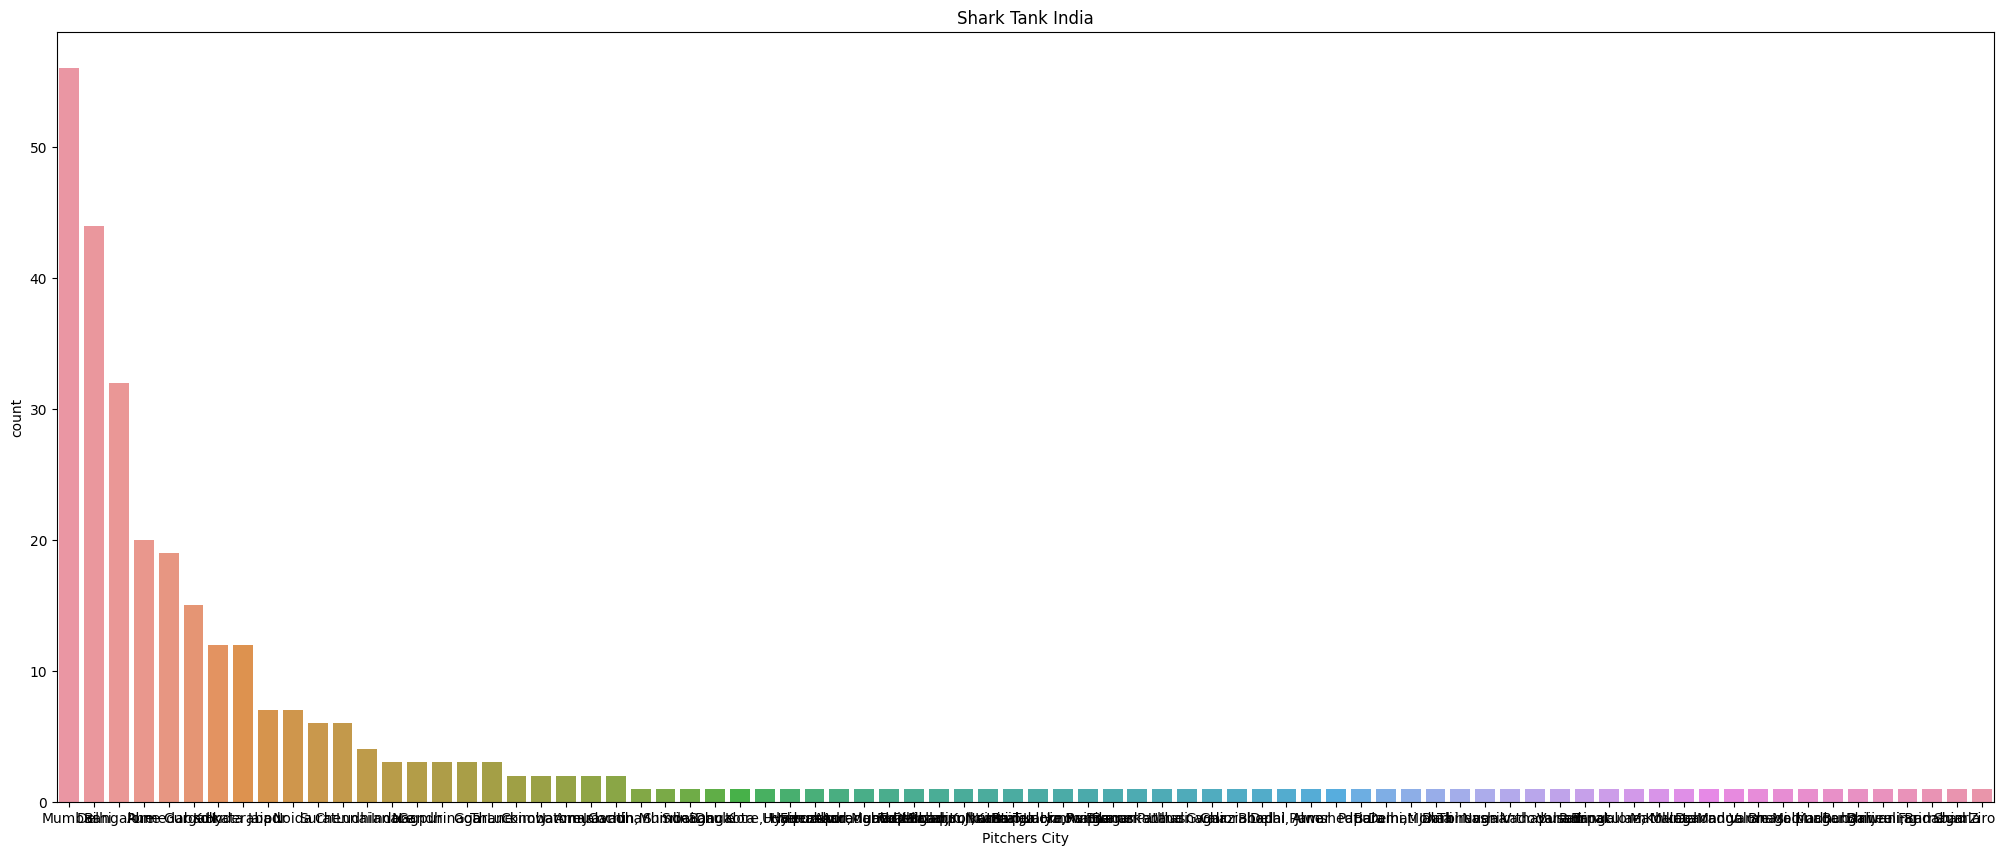

In [9]:
print(shark_tank['Pitchers City'].value_counts(), "\n")
fig = plt.figure(figsize=(25, 10))
ax = sns.countplot(x='Pitchers City', data=shark_tank, order=shark_tank['Pitchers City'].value_counts().index)
ax.set_title('Shark Tank India')

2019.0    38
2020.0    31
2021.0    27
2018.0    26
2017.0    22
2016.0    18
2022.0     9
2015.0     4
2014.0     4
2005.0     1
2013.0     1
2012.0     1
2006.0     1
2010.0     1
Name: Started in, dtype: int64 



Text(0.5, 1.0, 'Shark Tank India')

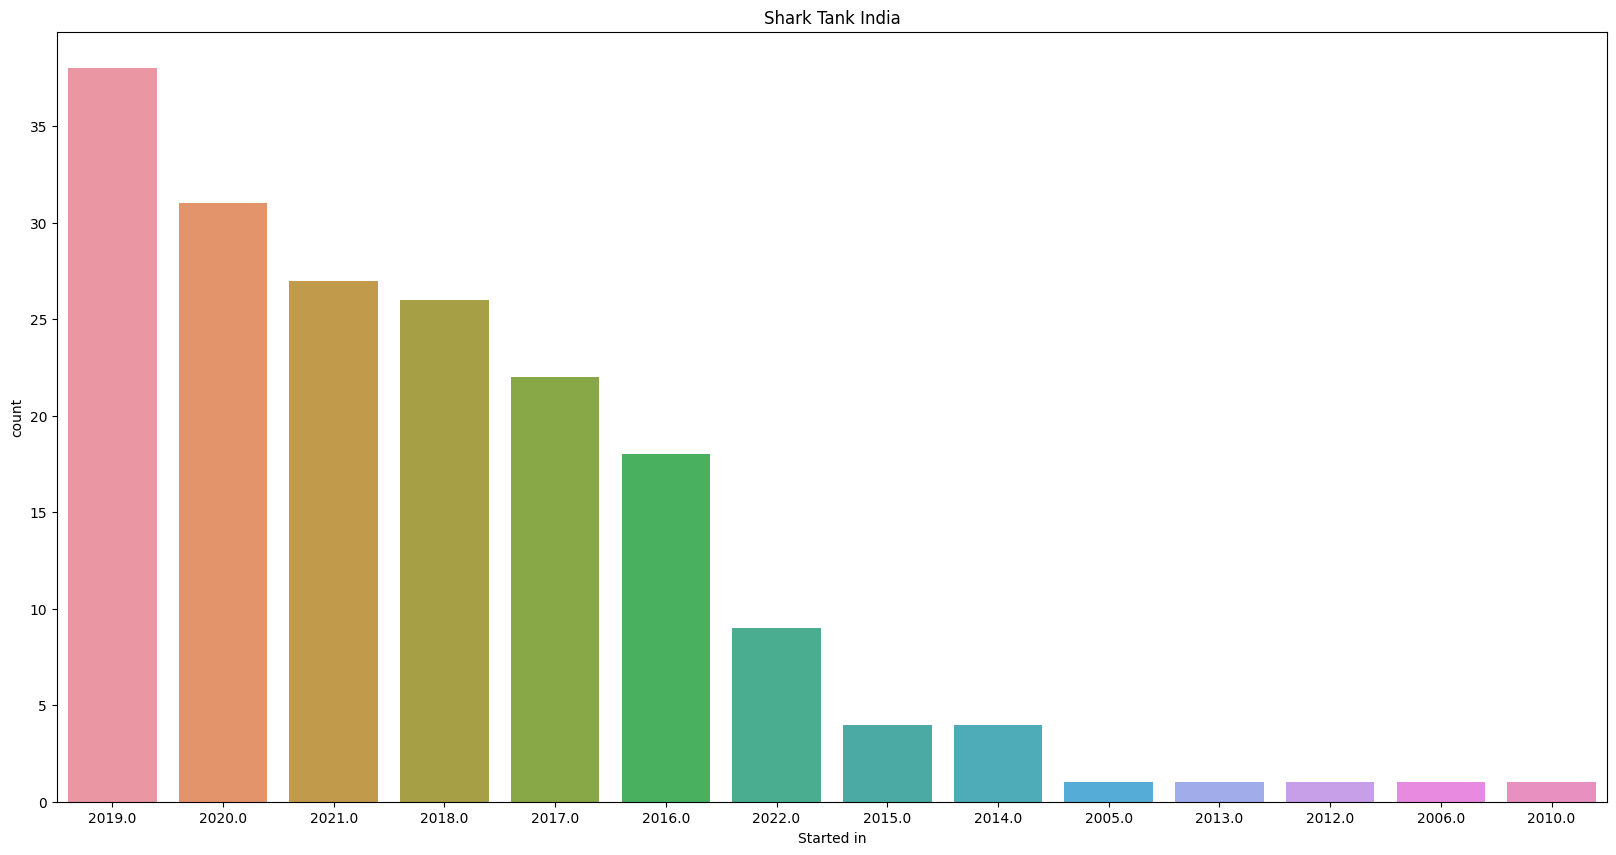

In [10]:
print(shark_tank['Started in'].value_counts(), "\n")
fig = plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Started in', data=shark_tank, order=shark_tank['Started in'].value_counts().index)
ax.set_title('Shark Tank India')

Maharashtra                  92
Delhi                        44
Karnataka                    34
Gujarat                      32
Haryana                      18
Uttar Pradesh                13
West Bengal                  13
Telangana                    12
Rajasthan                    11
Tamil Nadu                    8
Punjab                        8
Madhya Pradesh                5
Bihar                         4
Jammu & Kashmir               3
Goa                           3
Kerala                        2
Kerala,Maharashtra            1
Uttarakhand,Uttar Pradesh     1
Gujarat,Uttar Pradesh         1
Jharkhand,Chhattisgarh        1
Karnataka,Andhra Pradesh      1
Haryana,Maharashtra           1
Chhattisgarh                  1
Haryana,West Bengal           1
Uttarakhand                   1
Telangana,Maharashtra         1
Karnataka,Telangana           1
Jharkhand                     1
Himachal Pradesh              1
Haryana,Madhya Pradesh        1
Delhi,Maharashtra             1
Karnatak

Text(0.5, 1.0, 'Shark Tank India')

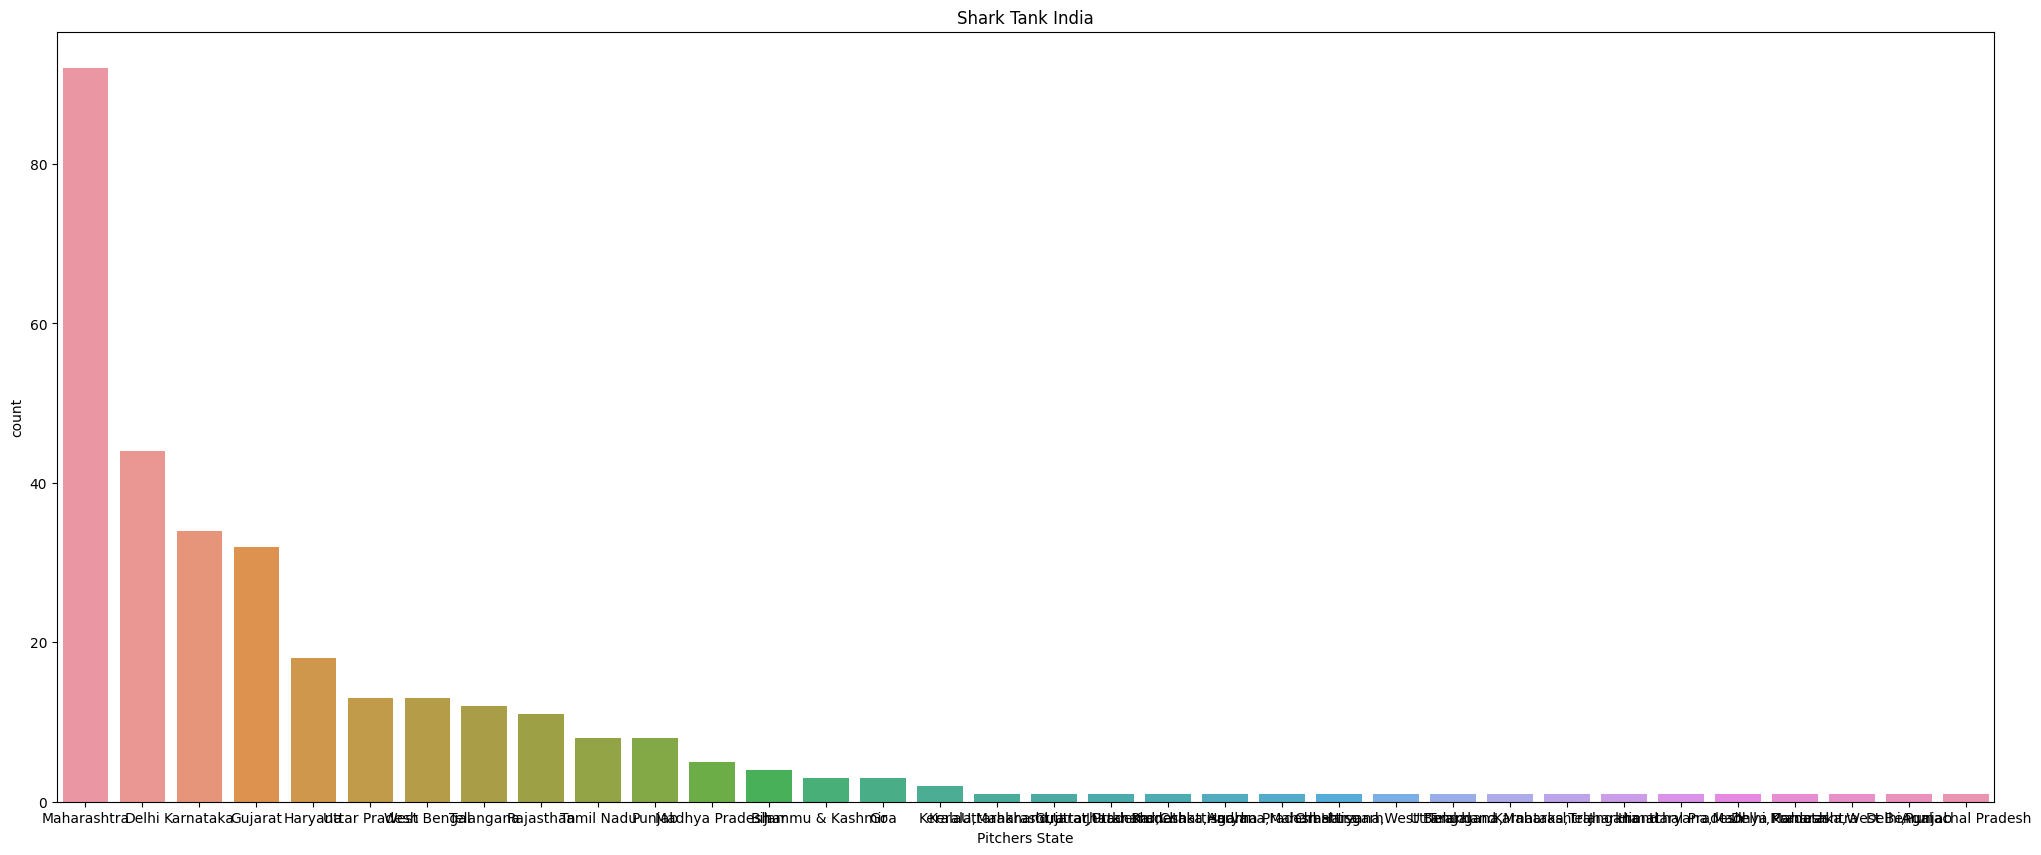

In [11]:
print(shark_tank['Pitchers State'].value_counts(), "\n")
fig = plt.figure(figsize=(25, 10))
ax = sns.countplot(x='Pitchers State', data=shark_tank, order=shark_tank['Pitchers State'].value_counts().index)
ax.set_title('Shark Tank India')

In [12]:
print(shark_tank['Industry'].value_counts())

tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Different Industries came in Shark Tank India </b>", color = 'Industry',template='simple_white', text=tmp)
fig.show()

Food                            82
Beauty/Fashion                  58
Manufacturing                   38
Services                        28
Technology/Software             26
Medical/Health                  23
Vehicles/Electrical Vehicles    13
Furnishing/Household            13
Education                        9
Sports                           7
Liquor/Beverages                 7
Animal/Pets                      5
Electronics                      4
Agriculture                      3
Hardware                         2
Entertainment                    2
Name: Industry, dtype: int64


In [13]:
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")

print("Total Male pitchers -", int(shark_tank['Male Presenters'].sum()), "\n")

print("Total female pitchers -", int(shark_tank['Female Presenters'].sum()), "\n")

print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "% (data incomplete)\n", sep='')

Total pitchers - 665 

Total Male pitchers - 484 

Total female pitchers - 178 

Male entrepreneurs percentage - 72.78%

Female entrepreneurs percentage - 26.77%

Couple entrepreneurs percentage - 8.87% (data incomplete)



In [14]:
print(shark_tank.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Yearly Revenue', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", title="Highest Revenue of the pitches", text=tmpdf['Yearly Revenue'].map(int).map(str) + "%")
fig.show()

Startup Name
FrenchCrown          7200.0
Rubans               5100.0
Toyshine             4500.0
GuardianGears        2500.0
GunjanAppsStudios    2400.0
UnStop               1600.0
StyloBug             1400.0
RaisingSuperstars    1300.0
DesmondJi            1200.0
Eume                 1200.0
Name: Yearly Revenue, dtype: float64


In [15]:
print(shark_tank.groupby('Startup Name')['Gross Margin'].max().nlargest(10))

tmpdf = shark_tank.sort_values('Gross Margin', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='Gross Margin', color="Startup Name", title="Highest Gross margin of the brands", text=tmpdf['Gross Margin'].map(int).map(str) + "%")
fig.show()

Startup Name
Poo-de-Cologne        150.0
Farda                 115.0
Cocofit                95.0
UnStop                 90.0
MidNightAngelsByPC     83.0
Auli                   80.0
LeafyAffair            80.0
Pflow                  80.0
ekatra                 80.0
oyehappy               80.0
Name: Gross Margin, dtype: float64


1    68%
0    32%
Name: Received Offer, dtype: object 



<Axes: xlabel='Received Offer', ylabel='count'>

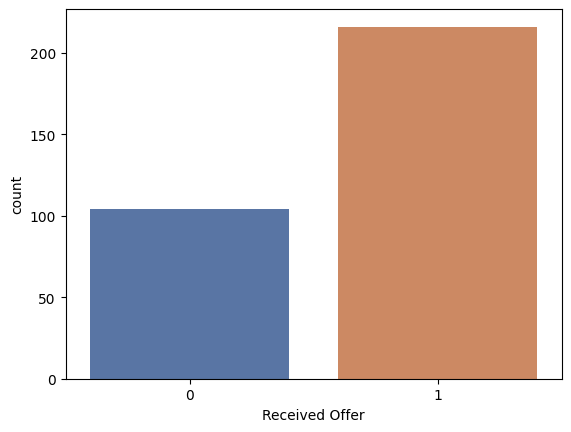

In [16]:
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Received Offer', data=shark_tank, palette='deep')

1.0    81%
0.0    19%
Name: Accepted Offer, dtype: object 



<Axes: xlabel='Accepted Offer', ylabel='count'>

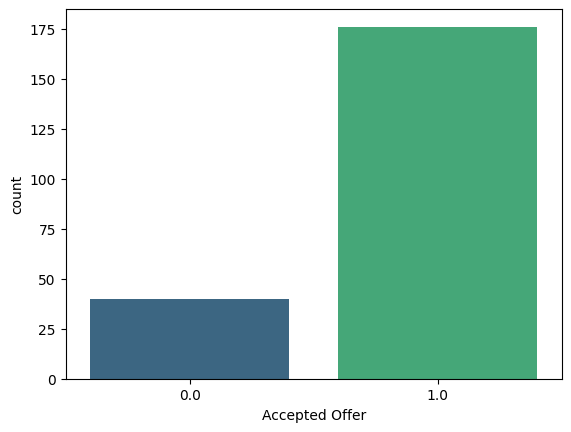

In [17]:
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Accepted Offer', data=shark_tank, palette="viridis")

In [18]:
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Startup Name","Original Ask Amount","Original Offered Equity","Valuation Requested","Deal Valuation"]]

,Startup Name,Original Ask Amount,Original Offered Equity,Valuation Requested,Deal Valuation
6,qZenseLabs,100.0,0.25,40000.000000,NaN
19,Torch-it,75.0,1.00,7500.000000,NaN
21,LaKheerDeli,50.0,7.50,667.000000,NaN
27,KabiraHandmad,100.0,5.00,2000.000000,NaN
41,MorrikoPureFoods,100.0,3.00,3333.000000,NaN
55,IndiaHempandCo,50.0,4.00,1250.000000,NaN
60,KetoIndia,150.0,1.25,12000.000000,NaN
70,Moonshine,80.0,0.50,16000.000000,NaN
71,Falhari,50.0,2.00,2500.000000,NaN
73,UrbanMonkey,100.0,1.00,10000.000000,NaN


Food                            8
Vehicles/Electrical Vehicles    3
Education                       3
Manufacturing                   2
Beauty/Fashion                  2
Animal/Pets                     1
Sports                          1
Technology/Software             1
Name: Industry, dtype: int64


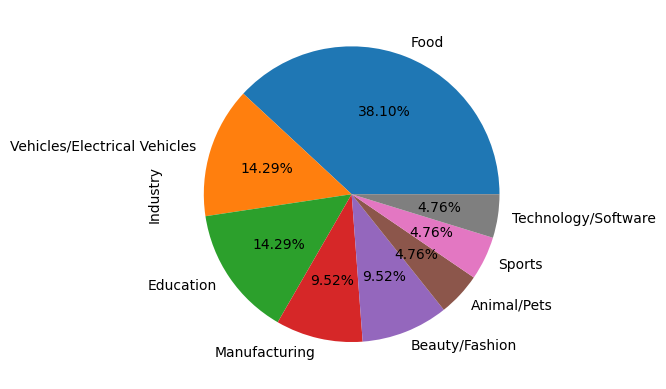

In [19]:
print(shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.bar(tmpdf, x="Ashneer Investment Equity", y='Ashneer Investment Amount', color="Startup Name", title="<b>Total equity received by Ashneer (in %) for investment (in lakhs)</b>", text=tmpdf['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Beauty/Fashion          13
Medical/Health          12
Food                    11
Manufacturing            8
Services                 6
Technology/Software      5
Education                3
Furnishing/Household     3
Sports                   2
Animal/Pets              1
Entertainment            1
Agriculture              1
Name: Industry, dtype: int64


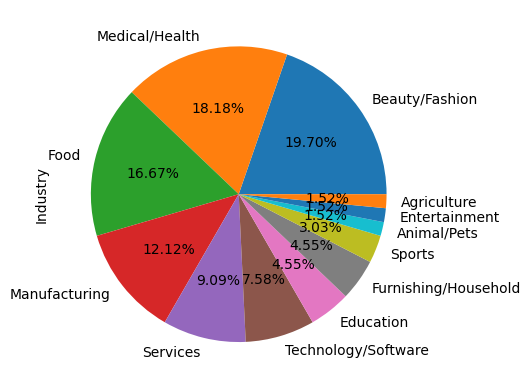

In [20]:
print(shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.bar(tmpdf, x="Namita Investment Equity", y='Namita Investment Amount', color="Startup Name", title="<b>Total equity received by Namita (in %) for investment (in lakhs)</b>", text=tmpdf['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Food                            17
Beauty/Fashion                  10
Medical/Health                   3
Manufacturing                    3
Vehicles/Electrical Vehicles     2
Liquor/Beverages                 2
Furnishing/Household             2
Sports                           1
Electronics                      1
Technology/Software              1
Services                         1
Name: Industry, dtype: int64


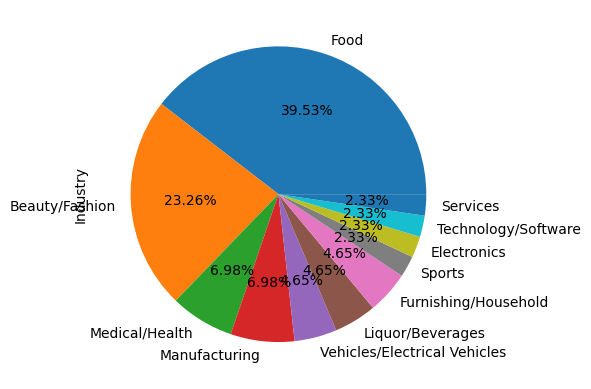

In [21]:
print(shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.bar(tmpdf, x="Vineeta Investment Equity", y='Vineeta Investment Amount', color="Startup Name", title="<b>Total equity received by Vineeta (in %) for investment (in lakhs)</b>", text=tmpdf['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Medical/Health                  11
Manufacturing                   11
Food                             8
Technology/Software              8
Services                         8
Beauty/Fashion                   7
Education                        3
Agriculture                      2
Sports                           2
Liquor/Beverages                 2
Furnishing/Household             2
Animal/Pets                      1
Hardware                         1
Entertainment                    1
Vehicles/Electrical Vehicles     1
Name: Industry, dtype: int64


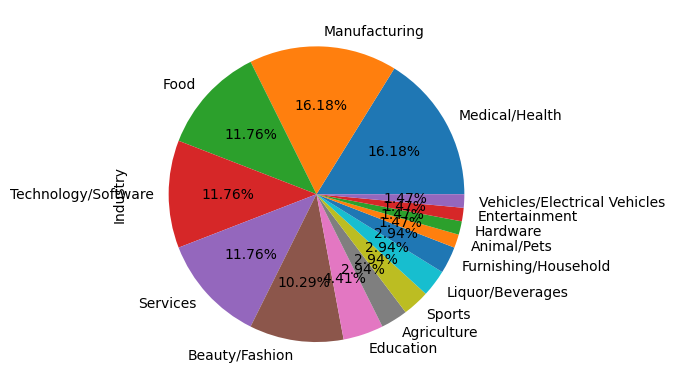

In [22]:
print(shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.bar(tmpdf, x="Peyush Investment Equity", y='Peyush Investment Amount', color="Startup Name", title="<b>Total equity received by Peyush (in %) for investment (in lakhs)</b>", text=tmpdf['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Food                            13
Beauty/Fashion                  11
Manufacturing                    7
Medical/Health                   6
Technology/Software              3
Vehicles/Electrical Vehicles     2
Education                        2
Animal/Pets                      1
Sports                           1
Electronics                      1
Liquor/Beverages                 1
Services                         1
Furnishing/Household             1
Name: Industry, dtype: int64


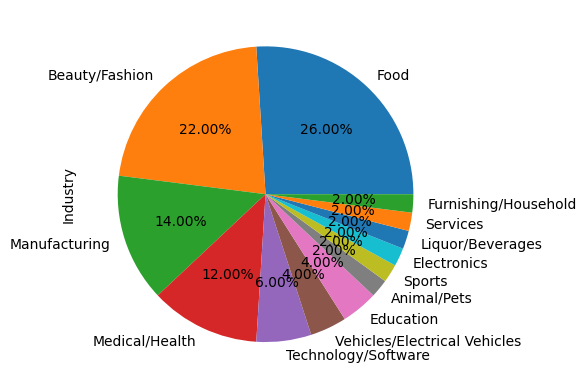

In [23]:
print(shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.bar(tmpdf, x="Anupam Investment Equity", y='Anupam Investment Amount', color="Startup Name", title="<b>Total equity received by Anupam (in %) for investment (in lakhs)</b>", text=tmpdf['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Food                            18
Beauty/Fashion                  14
Medical/Health                   8
Manufacturing                    7
Technology/Software              7
Services                         7
Vehicles/Electrical Vehicles     3
Education                        3
Liquor/Beverages                 2
Electronics                      1
Animal/Pets                      1
Entertainment                    1
Name: Industry, dtype: int64


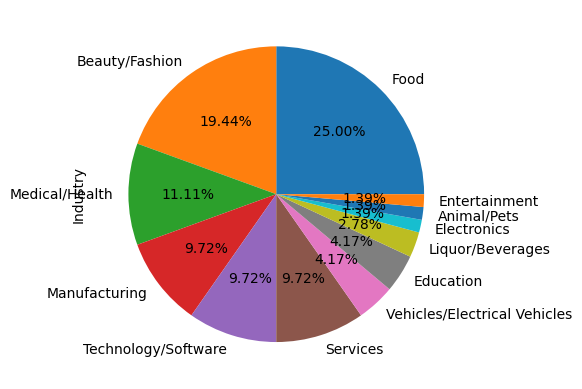

In [24]:
print(shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.bar(tmpdf, x="Aman Investment Equity", y='Aman Investment Amount', color="Startup Name", title="<b>Total equity received by Aman (in %) for investment (in lakhs)</b>", text=tmpdf['Aman Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Food              3
Medical/Health    2
Manufacturing     2
Beauty/Fashion    1
Name: Industry, dtype: int64


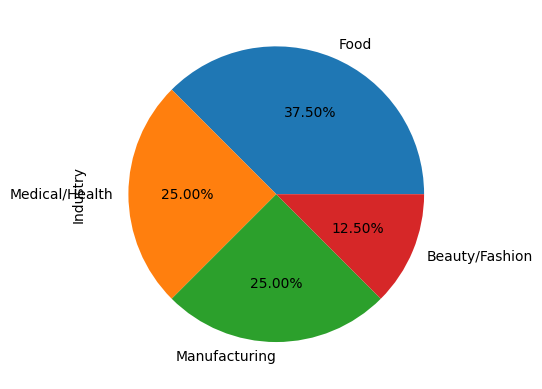

In [25]:
print(shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Ghazal Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ghazal Investment Amount']>0] [["Startup Name","Ghazal Investment Amount","Ghazal Investment Equity"]].sort_values(by="Ghazal Investment Equity")
fig = px.bar(tmpdf, x="Ghazal Investment Equity", y='Ghazal Investment Amount', color="Startup Name", title="<b>Total equity received by Ghazal (in %) for investment (in lakhs)</b>", text=tmpdf['Ghazal Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Food                            6
Beauty/Fashion                  5
Medical/Health                  3
Services                        2
Technology/Software             2
Manufacturing                   1
Furnishing/Household            1
Vehicles/Electrical Vehicles    1
Name: Industry, dtype: int64


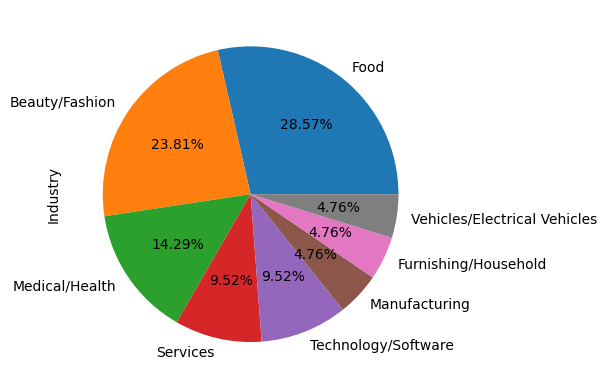

In [26]:
print(shark_tank[shark_tank['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Amit Investment Amount']>0] [["Startup Name","Amit Investment Amount","Amit Investment Equity"]].sort_values(by="Amit Investment Equity")
fig = px.bar(tmpdf, x="Amit Investment Equity", y='Amit Investment Amount', color="Startup Name", title="<b>Total equity received by Amit (in %) for investment (in lakhs)</b>", text=tmpdf['Amit Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

Beauty/Fashion      1
Liquor/Beverages    1
Name: Industry, dtype: int64


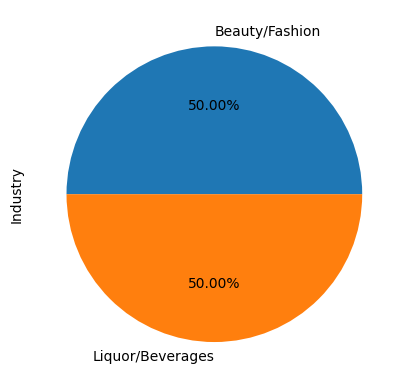

In [27]:
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.bar(tmpdf, x="Guest Investment Equity", y='Guest Investment Amount', color="Startup Name", title="<b>Total equity received by Guest (in %) for investment (in lakhs)</b>", text=tmpdf['Guest Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

1.0    42%
2.0    31%
3.0    16%
4.0     7%
5.0     5%
Name: Number of sharks in deal, dtype: object
The deals where more than or equals to 5 sharks are involved
           Startup Name  Total Deal Amount  Total Deal Equity
15        SkippiIcePops              100.0               15.0
50   FindYourKicksIndia               50.0               25.0
64               INACAN              100.0               10.0
80   SunfoxTechnologies              100.0                6.0
209              Snitch              150.0                1.5
239            Mahantam               30.0               20.0
274         Pharmallama              200.0                5.0
311           Sahayatha              100.0               10.0


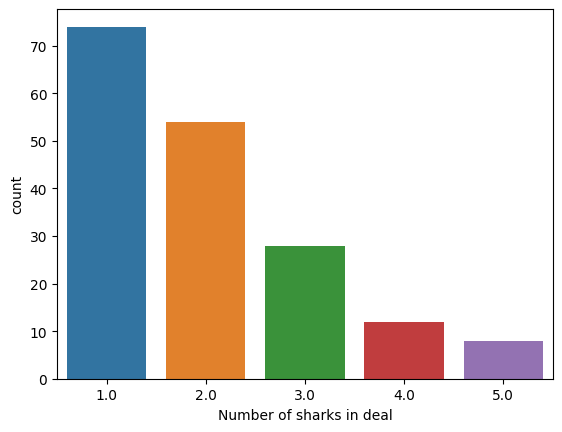

In [28]:
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))
sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
print('The deals where more than or equals to 5 sharks are involved')
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Startup Name","Total Deal Amount","Total Deal Equity"]])

In [29]:
print(format_currency(shark_tank['Original Ask Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores')

₹540.41 crores


In [30]:
print(format_currency(shark_tank['Total Deal Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores')

₹110.06 crores


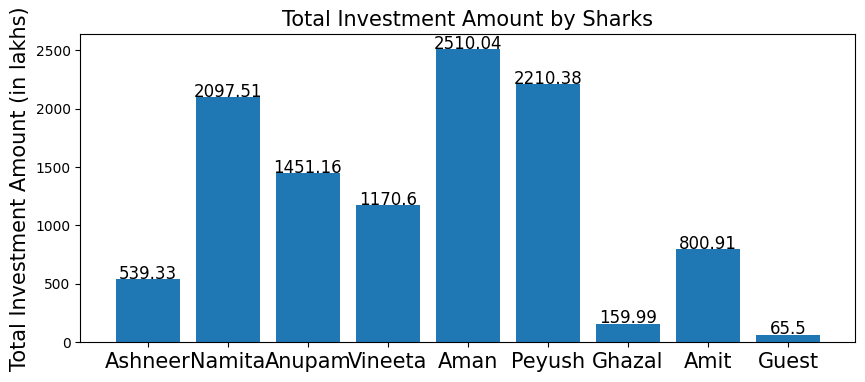

In [32]:
Amount = [shark_tank['Ashneer Investment Amount'].sum(), shark_tank['Namita Investment Amount'].sum(), shark_tank['Anupam Investment Amount'].sum(), shark_tank['Vineeta Investment Amount'].sum(),
    shark_tank['Aman Investment Amount'].sum(), shark_tank['Peyush Investment Amount'].sum(), shark_tank['Ghazal Investment Amount'].sum(),shark_tank['Amit Investment Amount'].sum(),shark_tank['Guest Investment Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal','Amit','Guest']
df = {'Name':name, 'Total Amount':Amount }
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount (in lakhs)",fontsize=15)
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount by Sharks", fontsize=15)
plt.show()

In [33]:
print(format_currency(shark_tank['Total Deal Debt'].sum()/100,'INR',locale='en_IN').replace('.00',''),'crores')

₹18.11 crores


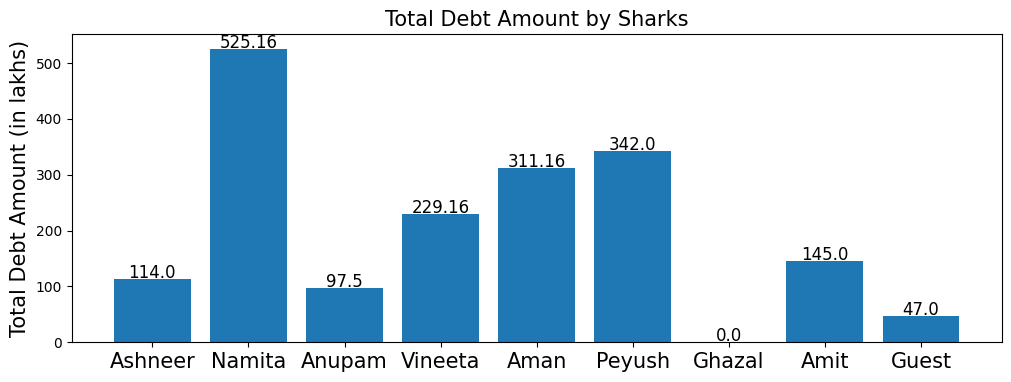

In [35]:
Amount = [shark_tank['Ashneer Debt Amount'].sum(), shark_tank['Namita Debt Amount'].sum(), shark_tank['Anupam Debt Amount'].sum(), shark_tank['Vineeta Debt Amount'].sum(),
    shark_tank['Aman Debt Amount'].sum(), shark_tank['Peyush Debt Amount'].sum(), shark_tank['Ghazal Debt Amount'].sum(),shark_tank['Amit Debt Amount'].sum(),shark_tank['Guest Debt Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal','Amit','Guest']
df = {'Name':name, 'Total Amount':Amount }
plt.figure(figsize=(12,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Debt Amount (in lakhs)",fontsize=15)
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Debt Amount by Sharks", fontsize=15)
plt.show()

In [36]:
print("Peyush Bansal's total investments", shark_tank[shark_tank['Peyush Investment Amount']>0][['Peyush Investment Amount']].count().to_string()[-2:])
print("Investment amount by Peyush", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Peyush", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Peyush", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Peyush Investment Amount']>0][["Startup Name","Industry","Peyush Investment Amount"]].reset_index())

Peyush Bansal's total investments 68
Investment amount by Peyush 22.1 crores

Equity received by Peyush 422.11 % in different companies

Debt/loan amount by Peyush 3.42 crores

--------------------------------------------------------------------------------
    index        Startup Name        Industry  Peyush Investment Amount
0      23  VivalyfInnovations  Medical/Health                     28.00
1      26               Ariro   Manufacturing                     25.00
2      28             Nuutjob  Beauty/Fashion                      8.33
3      29            Meatyour            Food                     10.00
4      30           EventBeep       Education                     10.00
..    ...                 ...             ...                       ...
63    279              GROWiT     Agriculture                     25.00
64    281             Trunome  Medical/Health                     37.50
65    298         SinghStyled  Beauty/Fashion                     50.00
66    309         LilG

In [37]:
print("Aman Gupta's total investments", shark_tank[shark_tank['Aman Investment Amount']>0][['Aman Investment Amount']].count().to_string()[-2:])
print("Investment amount by Aman", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Aman", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Aman", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Aman Investment Amount']>0][["Startup Name","Industry","Aman Investment Amount"]].reset_index())

Aman Gupta's total investments 72
Investment amount by Aman 25.1 crores

Equity received by Aman 260.93 % in different companies

Debt/loan amount by Aman 3.11 crores

--------------------------------------------------------------------------------
    index      Startup Name                      Industry  \
0       0     BluePineFoods                          Food   
1       7         Peeschute                Beauty/Fashion   
2      11            Bummer                Beauty/Fashion   
3      12        RevampMoto  Vehicles/Electrical Vehicles   
4      15     SkippiIcePops                          Food   
..    ...               ...                           ...   
67    283  What'sUpWellness                          Food   
68    300  ThePlatedProject                      Services   
69    306            Rubans                Beauty/Fashion   
70    311         Sahayatha                Medical/Health   
71    317               TAC                Beauty/Fashion   

    Aman Investmen

In [38]:
print("Ghazal Alagh's total investments", shark_tank[shark_tank['Ghazal Investment Amount']>0][['Ghazal Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ghazal", round(shark_tank['Ghazal Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Ghazal", round(shark_tank['Ghazal Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Ghazal", round(shark_tank['Ghazal Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Ghazal Investment Amount']>0][["Startup Name","Industry","Ghazal Investment Amount"]])

Ghazal Alagh's total investments  8
Investment amount by Ghazal 1.6 crores

Equity received by Ghazal 51.7 % in different companies

Debt/loan amount by Ghazal 0.0 crores

--------------------------------------------------------------------------------
           Startup Name        Industry  Ghazal Investment Amount
76           TheSassBar  Beauty/Fashion                 25.000000
80   SunfoxTechnologies  Medical/Health                 20.000000
86    WattTechnovations  Medical/Health                  0.000253
89              HumpyA2            Food                 33.330000
91    GoldSafeSolutions   Manufacturing                 16.660000
92           WakaoFoods            Food                 25.000000
111    NomadFoodProject            Food                 10.000000
122             WitBlox   Manufacturing                 30.000000


In [39]:
print("Ashneer Grover's total investments", shark_tank[shark_tank['Ashneer Investment Amount']>0][['Ashneer Investment Amount']].count().to_string()[-2:])
print("Investment amount by Ashneer", round(shark_tank['Ashneer Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Ashneer", round(shark_tank['Ashneer Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Ashneer", round(shark_tank['Ashneer Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Ashneer Investment Amount']>0][["Startup Name","Industry","Ashneer Investment Amount"]])

Ashneer Grover's total investments 21
Investment amount by Ashneer 5.39 crores

Equity received by Ashneer 93.24 % in different companies

Debt/loan amount by Ashneer 1.14 crores

--------------------------------------------------------------------------------
           Startup Name                      Industry  \
0         BluePineFoods                          Food   
1          BoozScooters  Vehicles/Electrical Vehicles   
3             TagzFoods                          Food   
15        SkippiIcePops                          Food   
18    RaisingSuperstars                     Education   
22          BeyondSnack                          Food   
24         MotionBreeze  Vehicles/Electrical Vehicles   
30            EventBeep                     Education   
39        TheYarnBazaar                 Manufacturing   
46          BambooIndia                 Manufacturing   
50   FindYourKicksIndia                Beauty/Fashion   
51         AasVidyalaya                     Education  

In [40]:
print("Namita Thapar's Total Investments", shark_tank[shark_tank['Namita Investment Amount']>0][['Namita Investment Amount']].count().to_string()[-2:])
print("Investment amount by Namita", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Namita", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Namita", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]])

Namita Thapar's Total Investments 66
Investment amount by Namita 20.98 crores

Equity received by Namita 301.59 % in different companies

Debt/loan amount by Namita 5.25 crores

--------------------------------------------------------------------------------
         Startup Name        Industry  Namita Investment Amount
10        JhaJiAchaar            Food                     28.30
11             Bummer  Beauty/Fashion                     37.50
15      SkippiIcePops            Food                     20.00
16       Menstrupedia       Education                     50.00
25              Altor   Manufacturing                     25.00
..                ...             ...                       ...
300  ThePlatedProject        Services                     25.00
304            SoulUp        Services                     50.00
306            Rubans  Beauty/Fashion                     33.33
310     ForeverModest  Beauty/Fashion                      5.00
311         Sahayatha  Medical/Health

In [41]:
print("Anupam Mittal's total investments", shark_tank[shark_tank['Anupam Investment Amount']>0][['Anupam Investment Amount']].count().to_string()[-2:])
print("Investment amount by Anupam", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Anupam", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Anupam", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Anupam Investment Amount']>0][["Startup Name","Industry","Anupam Investment Amount"]])

Anupam Mittal's total investments 50
Investment amount by Anupam 14.51 crores

Equity received by Anupam 305.83 % in different companies

Debt/loan amount by Anupam 0.98 crores

--------------------------------------------------------------------------------
               Startup Name                      Industry  \
2          HeartUpMySleeves                Beauty/Fashion   
9                     CosIQ                Beauty/Fashion   
12               RevampMoto  Vehicles/Electrical Vehicles   
15            SkippiIcePops                          Food   
20                   Kavach                     Education   
23       VivalyfInnovations                Medical/Health   
29                 Meatyour                          Food   
32   ARRCOATSurfaceTextures                 Manufacturing   
36                     LOKA           Technology/Software   
37                    Annie                     Education   
38               Carragreen                 Manufacturing   
39       

In [42]:
print("Vineeta Singh's total investments", shark_tank[shark_tank['Vineeta Investment Amount']>0][['Vineeta Investment Amount']].count().to_string()[-2:])
print("Investment amount by Vineeta", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Vineeta", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Vineeta", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]])

Vineeta Singh's total investments 43
Investment amount by Vineeta 11.71 crores

Equity received by Vineeta 242.3 % in different companies

Debt/loan amount by Vineeta 2.29 crores

--------------------------------------------------------------------------------
           Startup Name                      Industry  \
0         BluePineFoods                          Food   
1          BoozScooters  Vehicles/Electrical Vehicles   
2      HeartUpMySleeves                Beauty/Fashion   
8                  NOCD                          Food   
9                 CosIQ                Beauty/Fashion   
10          JhaJiAchaar                          Food   
15        SkippiIcePops                          Food   
65           Get-A-Whey                          Food   
67       TheQuirkyNaari                Beauty/Fashion   
80   SunfoxTechnologies                Medical/Health   
89              HumpyA2                          Food   
91    GoldSafeSolutions                 Manufacturing  

In [43]:
print("Amit Jain's total investments", shark_tank[shark_tank['Amit Investment Amount']>0][['Amit Investment Amount']].count().to_string()[-2:])
print("Investment amount by Amit", round(shark_tank['Amit Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Amit", round(shark_tank['Amit Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Amit", round(shark_tank['Amit Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Amit Investment Amount']>0][["Startup Name","Industry","Amit Investment Amount"]])

Amit Jain's total investments 21
Investment amount by Amit 8.01 crores

Equity received by Amit 109.0 % in different companies

Debt/loan amount by Amit 1.45 crores

--------------------------------------------------------------------------------
      Startup Name                      Industry  Amit Investment Amount
187      InsideFPV                 Manufacturing                   18.75
188      Angrakhaa                Beauty/Fashion                   40.00
191      MoppFoods                          Food                   75.00
193         Dobiee                          Food                   72.00
195          Pflow                Medical/Health                   30.00
201         ekatra          Furnishing/Household                   10.00
204      licksters                          Food                   25.00
226     ScrapUncle                      Services                   60.00
230         UnStop           Technology/Software                   50.00
259    Cakelicious     

In [44]:
print("Guest's total investments", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by Guest", round(shark_tank['Guest Investment Amount'].sum()/100, 2), "crores\n")
print("Equity received by Guest", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies\n")
print("Debt/loan amount by Guest", round(shark_tank['Guest Debt Amount'].sum()/100, 2), "crores\n")
print('-'*80)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount"]])

Guest's total investments  2
Investment amount by Guest 0.66 crores

Equity received by Guest 3.0 % in different companies

Debt/loan amount by Guest 0.47 crores

--------------------------------------------------------------------------------
    Startup Name          Industry  Guest Investment Amount
317          TAC    Beauty/Fashion                     40.5
318   Naara-Aaba  Liquor/Beverages                     25.0


In [45]:
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(15))
df1 = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:15]
fig = px.bar(df1, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=df1['Total Deal Equity'].map(int).map(str)+'%')
fig.show()

Startup Name
Sid07Designs          75.00
BoozScooters          50.00
IsakFragrances        50.00
HammerLifestyle       40.00
KGAgrotech            40.00
TheSassBar            35.00
VivalyfInnovations    33.33
GoldSafeSolutions     30.00
HeartUpMySleeves      30.00
JainShikanji          30.00
ColourMeMad-CMM       25.00
CosIQ                 25.00
FindYourKicksIndia    25.00
HoloKitab             25.00
PNT                   25.00
Name: Total Deal Equity, dtype: float64


In [46]:
print(shark_tank.groupby('Startup Name')['Total Deal Debt'].max().nlargest(15))
df1 = shark_tank.sort_values('Total Deal Debt', ascending=False)[0:15]
fig = px.bar(df1, x="Startup Name", y='Total Deal Debt', color="Startup Name", title="Highest Investment as per loan amount", text=df1['Total Deal Debt'])
fig.show()

Startup Name
Stage                150.0
WatchoutWearables    100.0
uBreathe             100.0
Otua                  99.0
Wol3D                 70.0
TAC                   69.0
maisha                65.0
Hood                  60.0
iMumz                 60.0
AyuSynk               50.0
DailyDump             50.0
Freebowler            50.0
GROWiT                50.0
LilGoodness           50.0
NamhyaFoods           50.0
Name: Total Deal Debt, dtype: float64


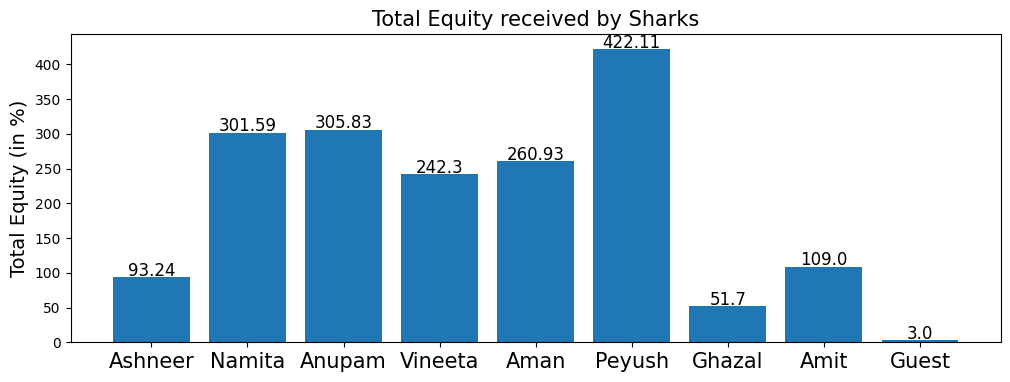

In [47]:
Equity = [shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum(),shark_tank['Amit Investment Equity'].sum(),
          shark_tank['Guest Investment Equity'].sum()]
df = {'Name':name, 'Total Equity':Equity }
plt.figure(figsize=(12,4))
plt.bar(df['Name'], df['Total Equity'])
plt.xticks(fontsize=15)
plt.ylabel("Total Equity (in %)",fontsize=14)
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received by Sharks", fontsize=15)
plt.show()

In [48]:
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]

,Startup Name,Valuation Requested,Deal Valuation
20,Kavach,50.0,50.0
22,BeyondSnack,2000.0,2000.0
45,Cocofit,0.0,0.0
86,WattTechnovations,0.0,0.0
171,TheSimplySalad,300.0,300.0
185,Janitri,4000.0,4000.0
203,NeoMotion,10000.0,10000.0
219,PadCare,2500.0,2500.0
223,Geeani,1000.0,1000.0
240,MindPeers,5300.0,5300.0
